In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from decimal import Decimal
from fractions import Fraction


In [2]:

monthly_one = pd.read_csv("../../CleanedCSVs/Macro_withavgIndex.csv")
monthly_one['Inflation_Rate'] = pd.to_numeric(monthly_one['Inflation_Rate'], errors='coerce')
monthly_one.head()

,Unnamed: 0,Date,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
0,1,1/2/08,4.11,2.32,14547.08,2631.435,1447.160
1,2,1/3/08,4.25,2.33,14524.54,2607.540,1447.160
2,3,1/4/08,4.18,2.32,14154.51,2537.865,1411.630
3,6,1/7/08,4.27,2.29,14168.24,2506.280,1417.075
4,7,1/8/08,4.27,2.29,14048.90,2474.255,1406.170


In [3]:

monthly_one['Date'] = pd.to_datetime(monthly_one['Date'])
monthly_one.set_index('Date', inplace= True)


In [4]:
#average out the date by month so we can mergwe with other macro files
macro_index_monthly = monthly_one.resample('M').mean()

macro_index_monthly

,Unnamed: 0,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
Date,,,,,,
2008-01-31,15.476190,3.931429,2.275238,13819.358333,2419.136429,1377.010714
2008-02-29,45.650000,2.962500,2.332500,13656.919500,2328.320750,1355.853000
2008-03-31,75.000000,2.629000,2.419000,13219.863250,2254.988500,1317.693250
2008-04-30,105.318182,2.267727,2.312727,13754.749773,2367.043864,1369.944318
2008-05-31,135.571429,1.993333,2.420000,14140.645238,2481.568810,1402.601667
...,...,...,...,...,...,...
2023-04-30,5583.947368,4.830000,2.267368,41109.224737,12067.621316,4119.108684
2023-05-31,5613.045455,5.045909,2.213636,41314.279091,12439.653182,4147.294091
2023-06-30,5644.904762,5.075714,2.200476,43315.891429,13447.516905,4339.481905


In [5]:
macro_index_monthly.dtypes

Unnamed: 0        float64
DFF               float64
Inflation_Rate    float64
Average_Dow       float64
Average_Nasdaq    float64
Average_S&P       float64
dtype: object

In [6]:
#drop the uneeded column
macro_index_monthly= macro_index_monthly.drop(["Unnamed: 0"], axis=1)


In [7]:
#reset date as column   
macro_index_monthly.reset_index(inplace=True)

In [31]:
#convert date to month year format 

macro_index_monthly['Year_Month'] = pd.to_datetime(macro_index_monthly['Date']).dt.strftime('%Y-%m')
macro_index_monthly['Year_Month'] = pd.to_datetime(macro_index_monthly['Year_Month'])
macro_index_monthly

,Date,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,Year_Month
0,2008-01-31,3.931429,2.275238,13819.358333,2419.136429,1377.010714,2008-01-01
1,2008-02-29,2.962500,2.332500,13656.919500,2328.320750,1355.853000,2008-02-01
2,2008-03-31,2.629000,2.419000,13219.863250,2254.988500,1317.693250,2008-03-01
3,2008-04-30,2.267727,2.312727,13754.749773,2367.043864,1369.944318,2008-04-01
4,2008-05-31,1.993333,2.420000,14140.645238,2481.568810,1402.601667,2008-05-01
...,...,...,...,...,...,...,...
183,2023-04-30,4.830000,2.267368,41109.224737,12067.621316,4119.108684,2023-04-01
184,2023-05-31,5.045909,2.213636,41314.279091,12439.653182,4147.294091,2023-05-01
185,2023-06-30,5.075714,2.200476,43315.891429,13447.516905,4339.481905,2023-06-01
186,2023-07-31,5.117000,2.296500,45079.773000,14033.748500,4506.729000,2023-07-01


In [40]:
#display data frame 
# macro_index_cleaned = macro_index_monthly.drop(["Date",axis = 1])
macro_index_cleaned = macro_index_monthly[['Year_Month', 'DFF', 'Inflation_Rate', 'Average_Dow', 'Average_Nasdaq','Average_S&P']]
index_df = pd.DataFrame(macro_index_cleaned)
index_df

,Year_Month,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
0,2008-01-01,3.931429,2.275238,13819.358333,2419.136429,1377.010714
1,2008-02-01,2.962500,2.332500,13656.919500,2328.320750,1355.853000
2,2008-03-01,2.629000,2.419000,13219.863250,2254.988500,1317.693250
3,2008-04-01,2.267727,2.312727,13754.749773,2367.043864,1369.944318
4,2008-05-01,1.993333,2.420000,14140.645238,2481.568810,1402.601667
...,...,...,...,...,...,...
183,2023-04-01,4.830000,2.267368,41109.224737,12067.621316,4119.108684
184,2023-05-01,5.045909,2.213636,41314.279091,12439.653182,4147.294091
185,2023-06-01,5.075714,2.200476,43315.891429,13447.516905,4339.481905
186,2023-07-01,5.117000,2.296500,45079.773000,14033.748500,4506.729000


In [17]:
#read in cpi data 
CPI= pd.read_csv("../../csv/CPIAUCSL_Monthly.csv")
CPI['Date'] = pd.to_datetime(CPI['Date'])
CPI.head()

,Date,CPIAUCSL
0,2008-01-01,212.174
1,2008-02-01,212.687
2,2008-03-01,213.448
3,2008-04-01,213.942
4,2008-05-01,215.208


In [41]:
CPI['Year_Month'] = pd.to_datetime(CPI['Date']).dt.strftime('%Y-%m')
CPI['Year_Month'] = pd.to_datetime(CPI['Year_Month'])
CPI_cleaned = CPI[['Year_Month', 'CPIAUCSL']]
CPI_cleaned['Year_Month'] = pd.to_datetime(CPI_cleaned['Year_Month'])
CPI_df = pd.DataFrame(CPI_cleaned)
CPI_df

C:\Users\memel\AppData\Local\Temp\ipykernel_40452\3592405296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI_cleaned['Year_Month'] = pd.to_datetime(CPI_cleaned['Year_Month'])


,Year_Month,CPIAUCSL
0,2008-01-01,212.174
1,2008-02-01,212.687
2,2008-03-01,213.448
3,2008-04-01,213.942
4,2008-05-01,215.208
...,...,...
182,2023-03-01,301.808
183,2023-04-01,302.918
184,2023-05-01,303.294
185,2023-06-01,303.841


In [38]:
UNRATE= pd.read_csv("../../csv/UNRATE_Monthly.csv")
UNRATE['Date'] = pd.to_datetime(UNRATE['Date'])
UNRATE['Year_Month'] = pd.to_datetime(UNRATE['Date']).dt.strftime('%Y-%m')
UNRATE['Year_Month'] = pd.to_datetime(UNRATE['Year_Month'])
UNRATE_cleaned = UNRATE[['Year_Month', 'UNRATE']]
UNRATE_df = pd.DataFrame(UNRATE_cleaned)
UNRATE_df

,Year_Month,UNRATE
0,2008-01-01,5.0
1,2008-02-01,4.9
2,2008-03-01,5.1
3,2008-04-01,5.0
4,2008-05-01,5.4
...,...,...
182,2023-03-01,3.5
183,2023-04-01,3.4
184,2023-05-01,3.7
185,2023-06-01,3.6


In [42]:
import functools as ft
dfs= [index_df,CPI_df,UNRATE_df]
indexmacro_monthly= ft.reduce(lambda left, right: pd.merge(left, right, on='Year_Month'), dfs)
indexmacro_monthly

,Year_Month,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,CPIAUCSL,UNRATE
0,2008-01-01,3.931429,2.275238,13819.358333,2419.136429,1377.010714,212.174,5.0
1,2008-02-01,2.962500,2.332500,13656.919500,2328.320750,1355.853000,212.687,4.9
2,2008-03-01,2.629000,2.419000,13219.863250,2254.988500,1317.693250,213.448,5.1
3,2008-04-01,2.267727,2.312727,13754.749773,2367.043864,1369.944318,213.942,5.0
4,2008-05-01,1.993333,2.420000,14140.645238,2481.568810,1402.601667,215.208,5.4
...,...,...,...,...,...,...,...,...
182,2023-03-01,4.653043,2.302174,39839.831957,11627.169783,3966.871957,301.808,3.5
183,2023-04-01,4.830000,2.267368,41109.224737,12067.621316,4119.108684,302.918,3.4
184,2023-05-01,5.045909,2.213636,41314.279091,12439.653182,4147.294091,303.294,3.7
185,2023-06-01,5.075714,2.200476,43315.891429,13447.516905,4339.481905,303.841,3.6


In [44]:
indexmacro_monthly.to_csv("../../CleanedCSVs/Monthly_Macro_Indexes.csv")

the  correlation between the Average DOW  and CPI is  0.94


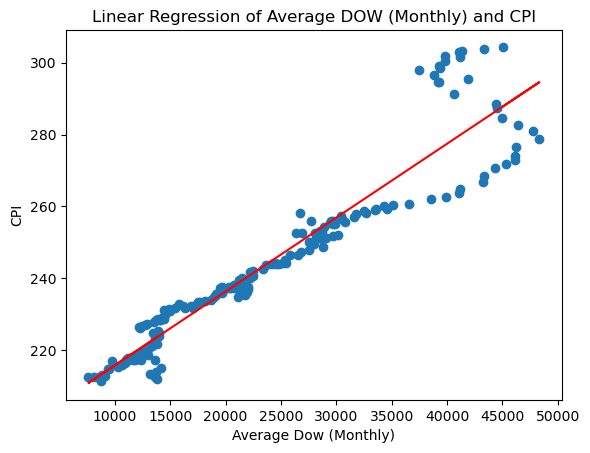

In [60]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
x_axis= indexmacro_monthly['Average_Dow']
y_axis=indexmacro_monthly['CPIAUCSL']
print(f'the  correlation between the Average DOW  and CPI is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average DOW (Monthly) and CPI")
plt.xlabel('Average Dow (Monthly)')
plt.ylabel('CPI')
plt.savefig("figures/AverageDowvsCPIpng")
plt.show()

the  correlation between the Average Nasdaq and CPI is  0.92


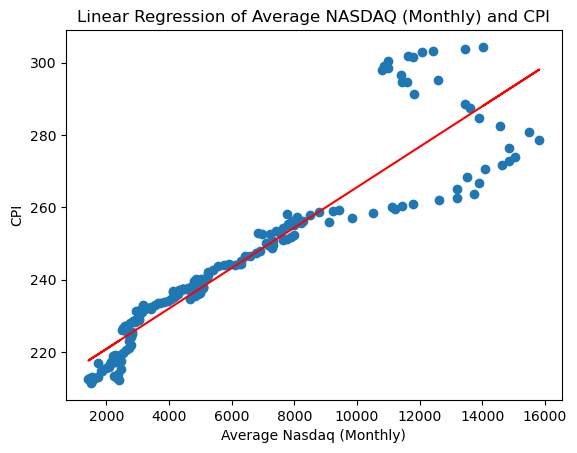

In [61]:

x_axis= indexmacro_monthly['Average_Nasdaq']
y_axis=indexmacro_monthly['CPIAUCSL']
print(f'the  correlation between the Average Nasdaq and CPI is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average NASDAQ (Monthly) and CPI")
plt.xlabel('Average Nasdaq (Monthly)')
plt.ylabel('CPI')
plt.savefig("figures/AverageNasdaqvsCPIpng")
plt.show()

the  correlation between the Average S&P and CPI is  0.95


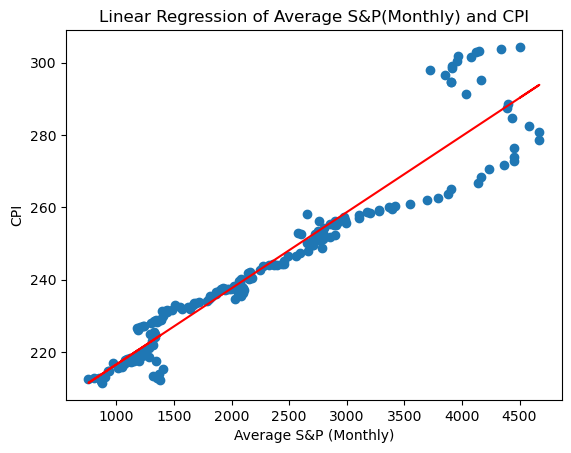

In [62]:
x_axis= indexmacro_monthly['Average_S&P']
y_axis=indexmacro_monthly['CPIAUCSL']
print(f'the  correlation between the Average S&P and CPI is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P(Monthly) and CPI")
plt.xlabel('Average S&P (Monthly)')
plt.ylabel('CPI')
plt.savefig("figures/AverageS&PvsCPIpng")
plt.show()

the  correlation between the Average Dow and Unemployement Rate is  -0.62


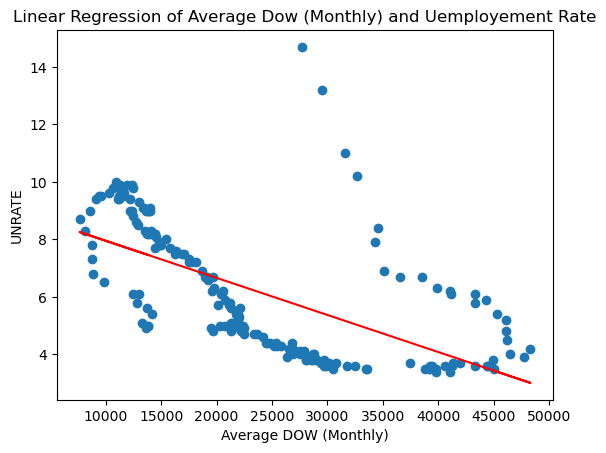

In [63]:
x_axis= indexmacro_monthly['Average_Dow']
y_axis=indexmacro_monthly['UNRATE']
print(f'the  correlation between the Average Dow and Unemployement Rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average Dow (Monthly) and Uemployement Rate")
plt.xlabel('Average DOW (Monthly)')
plt.ylabel('UNRATE')
plt.savefig("figures/AverageDOWvsUNRATEpng")
plt.show()

the  correlation between the Average Nasdaq and Unemployement Rate is  -0.54


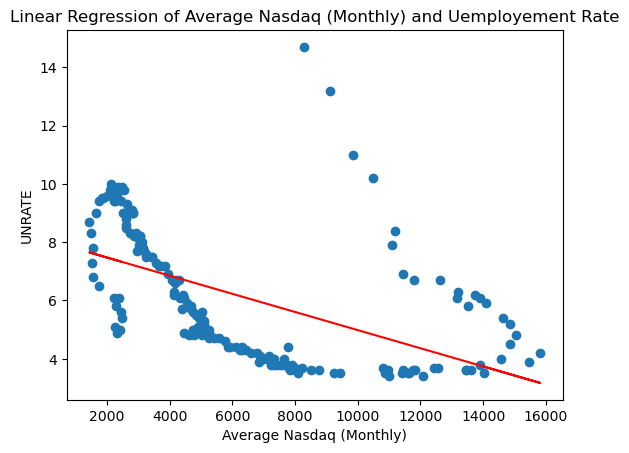

In [64]:
x_axis= indexmacro_monthly['Average_Nasdaq']
y_axis=indexmacro_monthly['UNRATE']
print(f'the  correlation between the Average Nasdaq and Unemployement Rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average Nasdaq (Monthly) and Uemployement Rate")
plt.xlabel('Average Nasdaq (Monthly)')
plt.ylabel('UNRATE')
plt.savefig("figures/AverageNasdaqvsUNRATEpng")
plt.show()

the  correlation between the Average S&P and Unemployement Rate is  -0.62


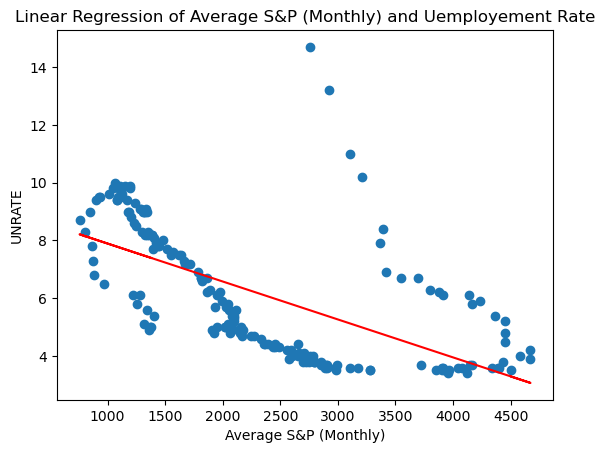

In [65]:
x_axis= indexmacro_monthly['Average_S&P']
y_axis=indexmacro_monthly['UNRATE']
print(f'the  correlation between the Average S&P and Unemployement Rate is  {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.title("Linear Regression of Average S&P (Monthly) and Uemployement Rate")
plt.xlabel('Average S&P (Monthly)')
plt.ylabel('UNRATE')
plt.savefig("figures/AverageS&PvsUNRATEpng")
plt.show()